In [2]:
import os
import glob
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
import torch.optim as optimizers
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision import datasets
import torchvision.transforms as transforms 
from callback import EarlyStopping

In [3]:
class BiRNN(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__() 
        self.l1 = nn.LSTM(1463, hidden_dim, batch_first=True, bidirectional=True)
        self.l2 = nn.Linear(hidden_dim*2, 3) 

        nn.init.xavier_normal_(self.l1.weight_ih_l0) 
        nn.init.orthogonal_(self.l1.weight_hh_l0)
        nn.init.xavier_normal_(self.l2.weight) 

    def forward(self, x):
        h, _ = self.l1(x) 
        y = self.l2(h) 
        return y

In [4]:
def clean(df):
    #共通で不要
    col = ['start(exchange)[ms]', 'end(system)[ms]', 'end(exchange)[ms]',\
    'kinectstart(exchange)[ms]', 'kinectend(system)[ms]',\
    'kinectend(exchange)[ms]', 'SS_ternary', 'TC_ternary', 'TS_ternary', 'SS',\
    'TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TS1', 'TS2', 'TS3', 'TS4', 'TS5',
    ]

    res = []
    
    for data in df:
        res.append(torch.from_numpy(data.drop(col, axis=1).values))

    return res

In [5]:
def louocv(files, testfile):

    train_df = []
    test_df = []


    for file in files:
        if file == testfile:
            test_df.append(pd.read_csv(file))
        else:
            train_df.append(pd.read_csv(file))

    return train_df, test_df

In [6]:
def make_target(df):
    res = [] 

    for data in df:
        tmp = data.loc[:, 'TS1':'TS5'].sum(axis=1) > 20
        res.append(tmp.astype('int'))
    return res

In [7]:
def make_scaler(datas):
    scaler = StandardScaler() 
    scaler.fit(datas[0])
    return scaler 

In [8]:
def standardize(datas, scaler):
    res = []
    for data in datas:
        res.append(scaler.transform(data).tolist())
    return res

1人目
epoch: 1, loss: 0.775, acc: 0.634, val_loss: 0.622, val_acc: 0.712
epoch: 2, loss: 0.437, acc: 0.817, val_loss: 0.559, val_acc: 0.728
epoch: 3, loss: 0.335, acc: 0.865, val_loss: 0.555, val_acc: 0.697
epoch: 4, loss: 0.268, acc: 0.907, val_loss: 0.537, val_acc: 0.734
epoch: 5, loss: 0.216, acc: 0.933, val_loss: 0.537, val_acc: 0.733
epoch: 6, loss: 0.195, acc: 0.942, val_loss: 0.6, val_acc: 0.698
epoch: 7, loss: 0.188, acc: 0.928, val_loss: 0.555, val_acc: 0.724
epoch: 8, loss: 0.157, acc: 0.950, val_loss: 0.591, val_acc: 0.746
epoch: 9, loss: 0.113, acc: 0.980, val_loss: 0.562, val_acc: 0.728
epoch: 10, loss: 0.12, acc: 0.960, val_loss: 0.574, val_acc: 0.715
epoch: 11, loss: 0.099, acc: 0.974, val_loss: 0.632, val_acc: 0.744
early stopping


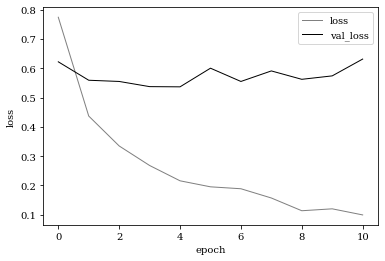

test_loss: 1.240, test_acc: 0.622
2人目
epoch: 1, loss: 0.673, acc: 0.666, val_loss: 0.543, val_acc: 0.752
epoch: 2, loss: 0.488, acc: 0.760, val_loss: 0.512, val_acc: 0.776
epoch: 3, loss: 0.423, acc: 0.811, val_loss: 0.568, val_acc: 0.741
epoch: 4, loss: 0.351, acc: 0.854, val_loss: 0.537, val_acc: 0.755
epoch: 5, loss: 0.284, acc: 0.892, val_loss: 0.478, val_acc: 0.799
epoch: 6, loss: 0.233, acc: 0.928, val_loss: 0.479, val_acc: 0.771
epoch: 7, loss: 0.203, acc: 0.931, val_loss: 0.502, val_acc: 0.772
epoch: 8, loss: 0.186, acc: 0.936, val_loss: 0.563, val_acc: 0.766
epoch: 9, loss: 0.202, acc: 0.923, val_loss: 0.62, val_acc: 0.741
epoch: 10, loss: 0.18, acc: 0.946, val_loss: 0.717, val_acc: 0.755
epoch: 11, loss: 0.162, acc: 0.944, val_loss: 0.576, val_acc: 0.797
early stopping


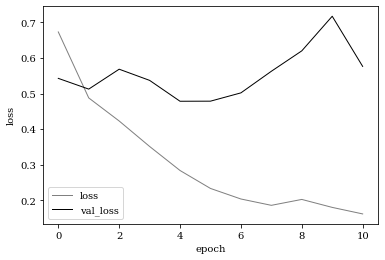

test_loss: 0.503, test_acc: 0.788
3人目
epoch: 1, loss: 0.727, acc: 0.652, val_loss: 0.574, val_acc: 0.715
epoch: 2, loss: 0.421, acc: 0.815, val_loss: 0.53, val_acc: 0.754
epoch: 3, loss: 0.344, acc: 0.860, val_loss: 0.533, val_acc: 0.755
epoch: 4, loss: 0.281, acc: 0.899, val_loss: 0.544, val_acc: 0.757
epoch: 5, loss: 0.228, acc: 0.924, val_loss: 0.567, val_acc: 0.740
epoch: 6, loss: 0.189, acc: 0.944, val_loss: 0.672, val_acc: 0.721
epoch: 7, loss: 0.16, acc: 0.958, val_loss: 0.692, val_acc: 0.723
epoch: 8, loss: 0.171, acc: 0.938, val_loss: 0.616, val_acc: 0.748
early stopping


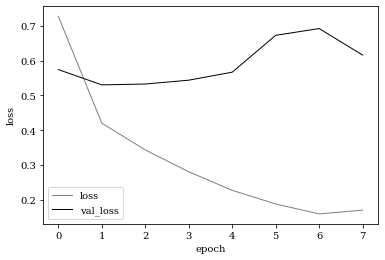

test_loss: 0.771, test_acc: 0.700
4人目
epoch: 1, loss: 0.741, acc: 0.641, val_loss: 0.597, val_acc: 0.697
epoch: 2, loss: 0.465, acc: 0.799, val_loss: 0.548, val_acc: 0.729
epoch: 3, loss: 0.392, acc: 0.837, val_loss: 0.538, val_acc: 0.742
epoch: 4, loss: 0.33, acc: 0.871, val_loss: 0.538, val_acc: 0.745
epoch: 5, loss: 0.28, acc: 0.908, val_loss: 0.542, val_acc: 0.745
epoch: 6, loss: 0.24, acc: 0.928, val_loss: 0.536, val_acc: 0.760
epoch: 7, loss: 0.218, acc: 0.933, val_loss: 0.606, val_acc: 0.722
epoch: 8, loss: 0.227, acc: 0.914, val_loss: 0.729, val_acc: 0.643
epoch: 9, loss: 0.254, acc: 0.892, val_loss: 0.574, val_acc: 0.724
epoch: 10, loss: 0.226, acc: 0.905, val_loss: 0.598, val_acc: 0.753


KeyboardInterrupt: 

In [9]:
FILE_PATH = "/home/r-yanagimoto/Hazumi1902/dumpfiles/*.csv"
files = glob.glob(FILE_PATH)

test_preds = []
test_ans = []

i = 0

for testfile in files:
    i += 1
    print(f'{i}人目')
    train_df, test_df = louocv(files, testfile)

    train_data = clean(train_df)
    train_target = make_target(train_df)


    test_data = clean(test_df)
    test_target = make_target(test_df)
    test_ans.append(test_target)

    x_train, x_valid, y_train, y_valid = train_test_split(train_data, train_target, shuffle=True)

    scaler = make_scaler(x_train)
    x_train = standardize(x_train, scaler) 
    x_valid = standardize(x_valid, scaler) 
    test_data = standardize(test_data, scaler)

    model = BiRNN(50) 


    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999), amsgrad=True)

    def compute_loss(t, y):
        return criterion(y, t)

    def train_step(x, t):
        model.train()
        preds = model(x)
        loss = compute_loss(t, preds)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        return loss, preds

    def val_step(x, t):
        model.eval()
        preds = model(x)
        loss = criterion(preds, t)

        return loss, preds

    # エポック数
    epochs = 200
    hist = {'loss': [], 'accuracy': [],
            'val_loss': [], 'val_accuracy': []}
    es = EarlyStopping(patience=5, verbose=1)

    for epoch in range(epochs):
        train_loss = 0. 
        train_acc = 0. 
        val_loss = 0. 
        val_acc = 0. 

        for (x, t) in zip(x_train, y_train):
            x = torch.tensor(x)
            t = torch.tensor(t)
            loss, preds = train_step(x, t) 
            train_loss += loss.item() 
            train_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 

        train_loss /= len(x_train) 
        train_acc /= len(x_train) 

        for (x, t) in zip(x_valid, y_valid):
            x = torch.tensor(x) 
            t = torch.tensor(t)
            loss, preds = val_step(x, t) 
            val_loss += loss.item() 
            val_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 

        val_loss /= len(x_valid) 
        val_acc /= len(x_valid)

        hist['loss'].append(train_loss) 
        hist['accuracy'].append(train_acc) 
        hist['val_loss'].append(val_loss) 
        hist['val_accuracy'].append(val_acc) 

        print('epoch: {}, loss: {:.3}, acc: {:.3f}, val_loss: {:.3}, val_acc: {:.3f}'.format(epoch+1, train_loss, train_acc, val_loss, val_acc))

        if es(val_loss):
            break
    
    # モデルの評価
    loss = hist['loss'] 
    val_loss = hist['val_loss'] 

    fig = plt.figure() 
    plt.rc('font', family='serif') 
    plt.plot(range(len(loss)), loss, color='gray', linewidth=1, label='loss') 
    plt.plot(range(len(val_loss)), val_loss, color='black', linewidth=1, label='val_loss') 
    plt.xlabel('epoch') 
    plt.ylabel('loss') 
    plt.legend() 
    plt.show() 

    # テストデータの評価
    def test_step(x, t):
        return val_step(x, t) 

    test_loss = 0.
    test_acc = 0. 

    for (x, t) in zip(test_data, test_target):
        x = torch.tensor(x) 
        t = torch.tensor(t)
        loss, preds = test_step(x, t) 
        test_loss += loss.item() 
        test_acc += accuracy_score(t.tolist(), preds.argmax(dim=-1).tolist()) 
        test_preds += preds
    
    print('test_loss: {:.3f}, test_acc: {:.3f}'.format(test_loss, test_acc))

In [ ]:
print(test_preds)

NameError: name 'test_preds' is not defined